<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [ ]:
!pip install pandas


In [1]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-04-19 11:32:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  68.9MB/s    in 2.2s    

2025-04-19 11:32:28 (68.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [4]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [5]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


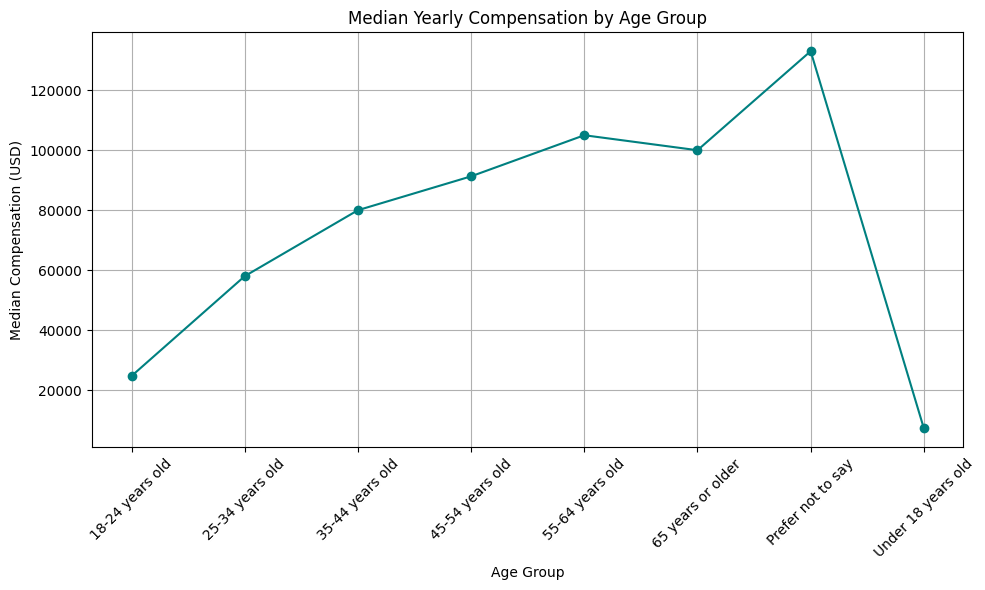

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Keep relevant columns and drop missing values
df = df[['Age', 'ConvertedCompYearly']].dropna()

# Remove outliers using IQR method
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Group by Age group and calculate median compensation
median_comp = df_clean.groupby('Age')['ConvertedCompYearly'].median().sort_index()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp.index, median_comp.values, marker='o', linestyle='-', color='teal')

# Add labels and title
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


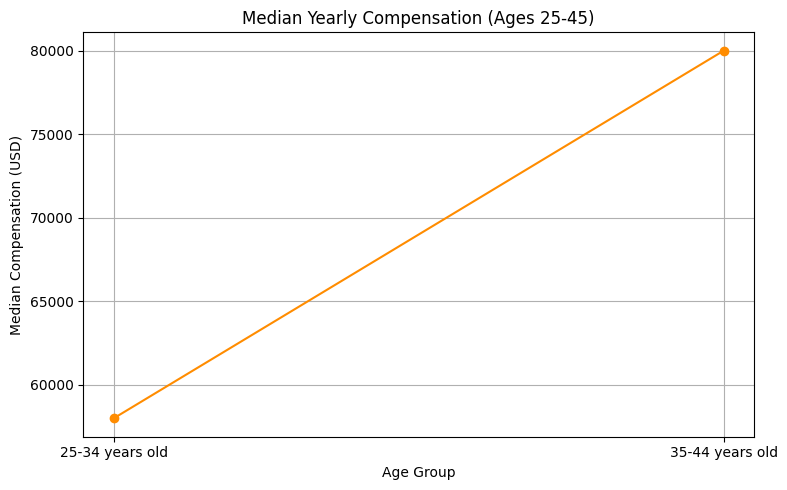

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Keep relevant columns and drop missing values
df = df[['Age', 'ConvertedCompYearly']].dropna()

# Remove outliers using IQR method
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Filter for ages 25-45
age_filter = ['25-34 years old', '35-44 years old']
df_filtered = df_clean[df_clean['Age'].isin(age_filter)]

# Group by Age group and calculate median compensation
median_comp = df_filtered.groupby('Age')['ConvertedCompYearly'].median().sort_index()

# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(median_comp.index, median_comp.values, marker='o', linestyle='-', color='darkorange')

# Add labels and title
plt.title('Median Yearly Compensation (Ages 25-45)')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


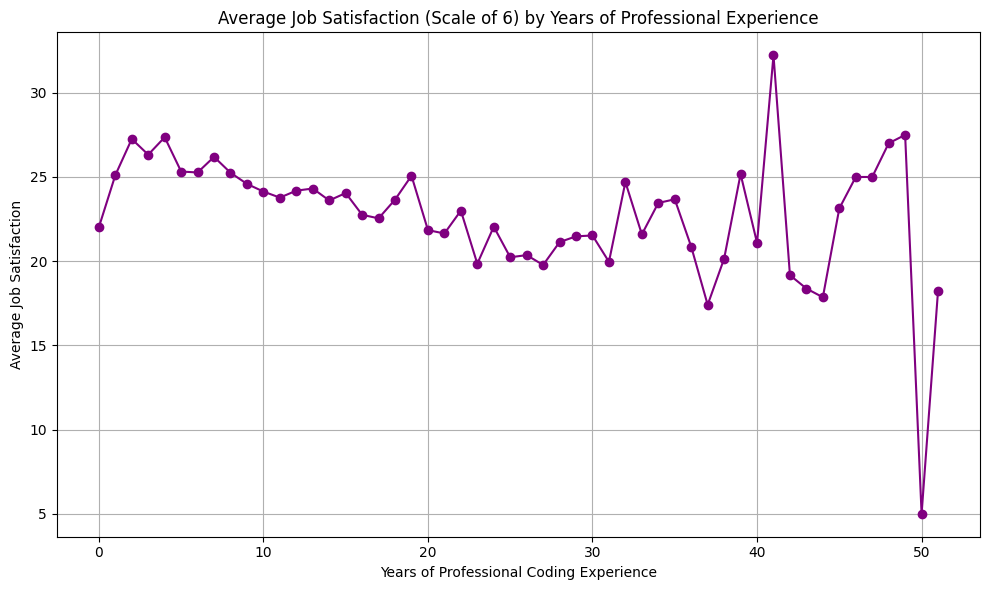

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Keep relevant columns and drop missing values
df = df[['YearsCodePro', 'JobSatPoints_6']].dropna()

# Convert JobSatPoints_6 to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Clean and convert YearsCodePro to numeric
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop any remaining NaNs after conversion
df = df.dropna()

# Group by YearsCodePro and calculate average job satisfaction
satisfaction_by_experience = df.groupby('YearsCodePro')['JobSatPoints_6'].mean()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(satisfaction_by_experience.index, satisfaction_by_experience.values, marker='o', linestyle='-', color='purple')

# Add labels and title
plt.title('Average Job Satisfaction (Scale of 6) by Years of Professional Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Average Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


/tmp/ipykernel_6467/550536679.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['WorkExp'] = pd.to_numeric(df_clean['WorkExp'], errors='coerce')


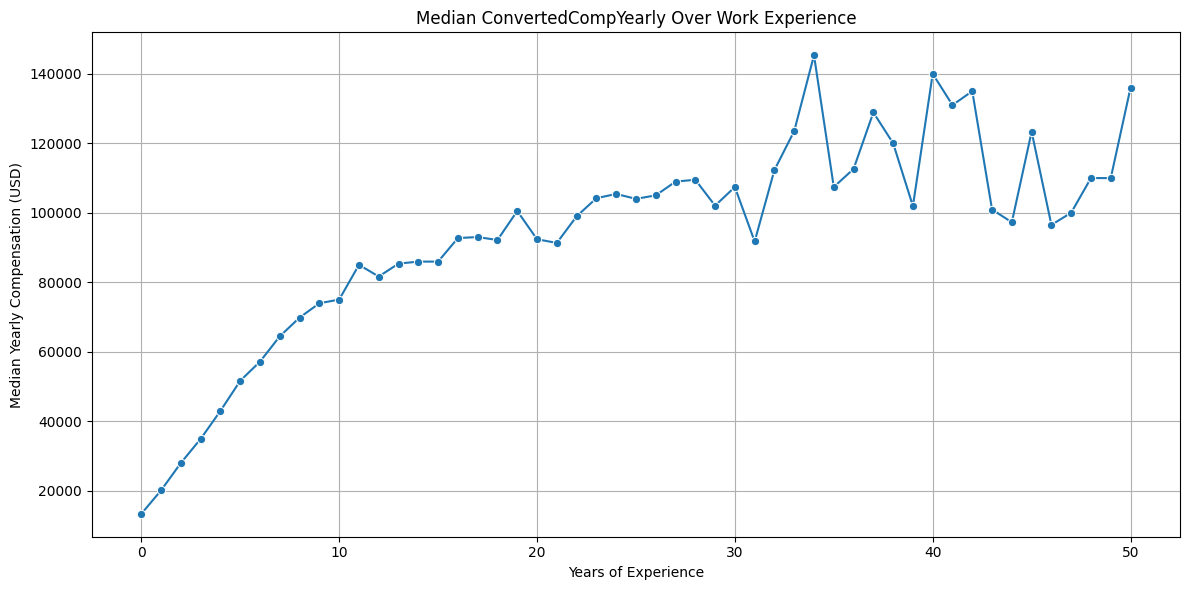

In [12]:
# !pip install seaborn
# import seaborn as sns
df = pd.read_csv("survey-data.csv")

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'WorkExp'])

# Convert WorkExp to numeric if it's not already
df_clean['WorkExp'] = pd.to_numeric(df_clean['WorkExp'], errors='coerce')

# Group by WorkExp and calculate median compensation
median_comp_by_exp = df_clean.groupby('WorkExp')['ConvertedCompYearly'].median().reset_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=median_comp_by_exp, x='WorkExp', y='ConvertedCompYearly', marker='o')
plt.title('Median ConvertedCompYearly Over Work Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Median Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


/tmp/ipykernel_6467/260555172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['WorkExp'] = pd.to_numeric(df_clean['WorkExp'], errors='coerce')


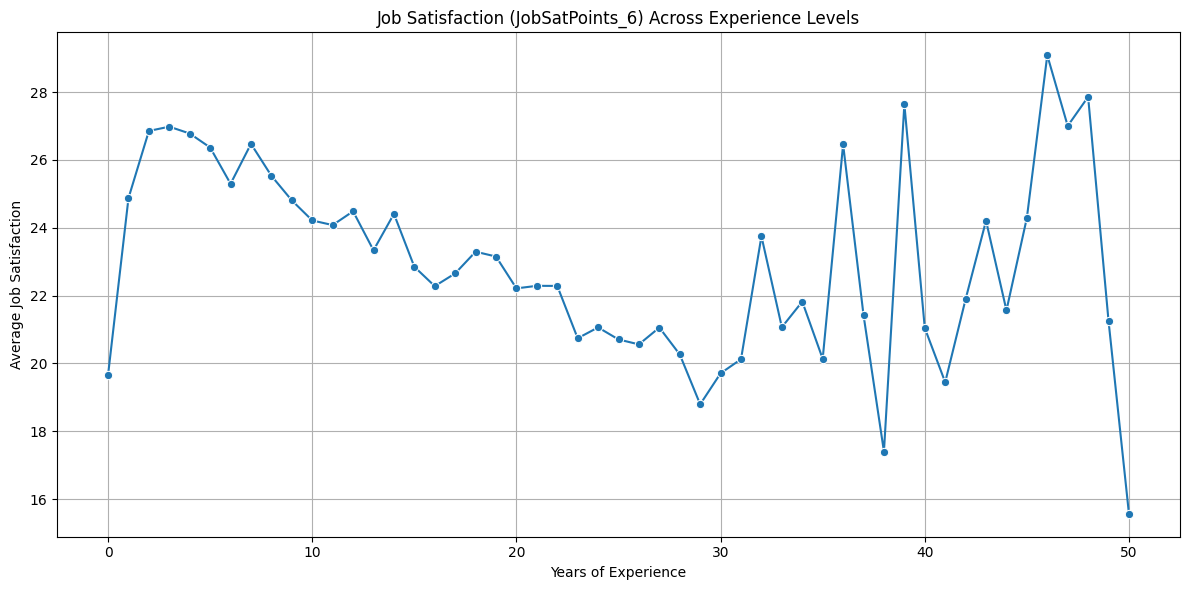

In [13]:
# Load the dataset
df = pd.read_csv('survey-data.csv')

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['JobSatPoints_6', 'WorkExp'])

# Convert WorkExp to numeric if it's not already
df_clean['WorkExp'] = pd.to_numeric(df_clean['WorkExp'], errors='coerce')

# Group by WorkExp and calculate the average JobSatPoints_6 (job satisfaction)
job_sat_by_exp = df_clean.groupby('WorkExp')['JobSatPoints_6'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=job_sat_by_exp, x='WorkExp', y='JobSatPoints_6', marker='o')
plt.title('Job Satisfaction (JobSatPoints_6) Across Experience Levels')
plt.xlabel('Years of Experience')
plt.ylabel('Average Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
